In [1]:
import numpy as np

# DGP constants
np.random.seed(123)
n = 6000
n_w = 30
support_size = 5
n_x = 5
# Outcome support
support_Y = np.random.choice(np.arange(n_w), size=support_size, replace=False)
coefs_Y = np.random.uniform(0, 1, size=support_size)
def epsilon_sample(n):
    return np.random.uniform(-1, 1, size=n)
# Treatment support
support_T = support_Y
coefs_T = np.random.uniform(0, 1, size=support_size)
def eta_sample(n):
    return np.random.uniform(-1, 1, size=n)

# Generate controls, covariates, treatments and outcomes
W = np.random.normal(0, 1, size=(n, n_w))
X = np.random.uniform(0, 1, size=(n, n_x))
# Heterogeneous treatment effects
TE1 = np.array([x_i[0] for x_i in X])
TE2 = np.array([x_i[0]**2 for x_i in X]).flatten()
T = np.dot(W[:, support_T], coefs_T) + eta_sample(n)
Y = TE1 * T + TE2 * T**2 + np.dot(W[:, support_Y], coefs_Y) + epsilon_sample(n)
# Generate test data
X_test = np.random.uniform(0, 1, size=(100, n_x))
X_test[:, 0] = np.linspace(0, 1, 100)

In [3]:
# Fit CausalForestDML with multivariate treatment
cf = CausalForestDML(n_estimators=200, random_state=0)
cf.fit(Y, T, X=X, W=None)

In [4]:
# Estimate CATEs and ATEs
cate = cf.effect(X)          
ate = cf.ate(X)              

(array([ 4.,  5.,  6.,  6.,  7., 10., 19., 12., 10., 13.,  9., 17., 24.,
        48., 48., 53., 34., 23., 23., 20., 19., 13., 18., 15., 13., 12.,
         7.,  3.,  2.,  7.]),
 array([-3.52695   , -3.31777074, -3.10859149, -2.89941224, -2.69023299,
        -2.48105373, -2.27187448, -2.06269523, -1.85351597, -1.64433672,
        -1.43515747, -1.22597821, -1.01679896, -0.80761971, -0.59844045,
        -0.3892612 , -0.18008195,  0.02909731,  0.23827656,  0.44745581,
         0.65663507,  0.86581432,  1.07499357,  1.28417282,  1.49335208,
         1.70253133,  1.91171058,  2.12088984,  2.33006909,  2.53924834,
         2.7484276 ]),
 <BarContainer object of 30 artists>)

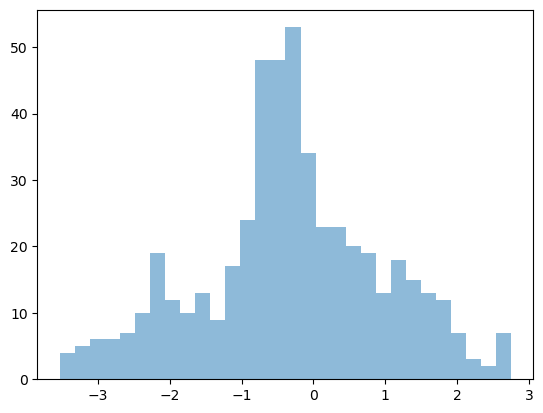

In [5]:
import matplotlib.pyplot as plt
plt.hist(cate, bins=30, alpha=0.5, label='CATE T1')

(array([ 3.,  1.,  0.,  2.,  5.,  8., 10., 13., 19., 21., 32., 30., 30.,
        40., 37., 39., 43., 32., 31., 21., 22., 16.,  9., 13.,  6.,  7.,
         4.,  3.,  2.,  1.]),
 array([-0.4011014 , -0.30946095, -0.2178205 , -0.12618006, -0.03453961,
         0.05710084,  0.14874129,  0.24038173,  0.33202218,  0.42366263,
         0.51530308,  0.60694352,  0.69858397,  0.79022442,  0.88186487,
         0.97350531,  1.06514576,  1.15678621,  1.24842666,  1.3400671 ,
         1.43170755,  1.523348  ,  1.61498845,  1.70662889,  1.79826934,
         1.88990979,  1.98155024,  2.07319068,  2.16483113,  2.25647158,
         2.34811203]),
 <BarContainer object of 30 artists>)

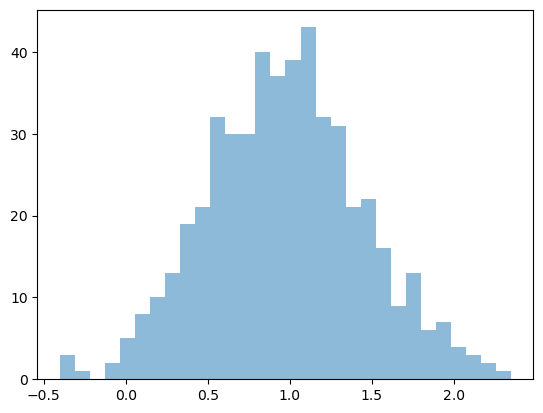

In [6]:
plt.hist(true_te1, bins=30, alpha=0.5, label='True TE T1')

(array([ 3.,  1.,  0.,  2.,  5.,  8., 10., 13., 19., 21., 32., 30., 30.,
        40., 37., 39., 43., 32., 31., 21., 22., 16.,  9., 13.,  6.,  7.,
         4.,  3.,  2.,  1.]),
 array([-2.4011014 , -2.30946095, -2.2178205 , -2.12618006, -2.03453961,
        -1.94289916, -1.85125871, -1.75961827, -1.66797782, -1.57633737,
        -1.48469692, -1.39305648, -1.30141603, -1.20977558, -1.11813513,
        -1.02649469, -0.93485424, -0.84321379, -0.75157334, -0.6599329 ,
        -0.56829245, -0.476652  , -0.38501155, -0.29337111, -0.20173066,
        -0.11009021, -0.01844976,  0.07319068,  0.16483113,  0.25647158,
         0.34811203]),
 <BarContainer object of 30 artists>)

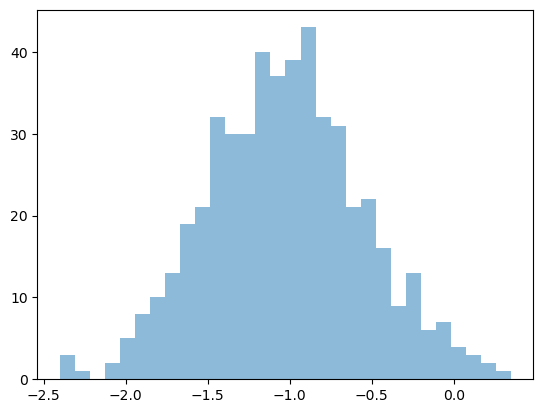

In [7]:
plt.hist(true_te2, bins=30, alpha=0.5, label='CATE T2')